<a href="https://colab.research.google.com/github/ilyes-frag/gridSearchcv/blob/main/Find_the_best_model_parameters_in_scikit_learn(gridSearchcv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


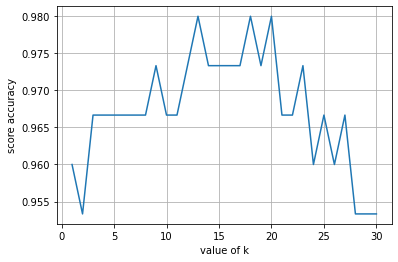

In [ ]:
iris=load_iris()
X=iris.data
y=iris.target
k_range=range(1,31)
k_scores=[]
for k in k_range:

  knn=KNeighborsClassifier(n_neighbors=k) 
  scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
  k_scores.append(scores.mean())
print (k_scores)
plt.plot(k_range,k_scores)
plt.xlabel('value of k')
plt.ylabel('score accuracy')
plt.grid(axis='both')

#***use the GridsearchCv for tuning parameter***

In [ ]:
 #this fonction remplace the for loop above 
 from sklearn.model_selection import GridSearchCV

In [ ]:
#DEFINE THE PARAMETRE VALUES THAT SHOULD BE SEARCHED
k_range=range(1,31)
print (k_range)

range(1, 31)


In [ ]:
#creat a parameter grid :map the parameter names to the values that should be searched
param_grid=dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': range(1, 31)}


In [ ]:
#intantiate the grid 
grid =GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')

In [ ]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 31)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=0)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.00053155, 0.00043566, 0.00043111, 0.00041234, 0.00041811,
        0.00041835, 0.0004154 , 0.00072432, 0.00049665, 0.00048251,
        0.00048449, 0.00046818, 0.00043979, 0.00045242, 0.00044892,
        0.00043862, 0.00053952, 0.00057359, 0.00045753, 0.00043559,
        0.00042033, 0.00042613, 0.00049152, 0.00042794, 0.00042145,
        0.00040908, 0.00042279, 0.00042479, 0.00045905, 0.00050054]),
 'mean_score_time': array([0.00168295, 0.00121253, 0.00123084, 0.00117176, 0.00120416,
        0.00123122, 0.0011764 , 0.00167592, 0.00149095, 0.00149415,
        0.0013762 , 0.00137227, 0.00130475, 0.00131695, 0.00138836,
        0.00131469, 0.00135968, 0.00151827, 0.00134671, 0.00135381,
        0.00123484, 0.00125961, 0.0014457 , 0.00123456, 0.00127211,
        0.00126638, 0.00131567, 0.00134268, 0.00140481, 0.00139306]),
 'mean_test_score': array([0.96      , 0.95333333, 0.96666667, 0.96666667, 0.96666667,
        0.96666667, 0.96666667, 0.96666667, 0.97333333, 0

In [ ]:
#grid_mean_scores=[result.mean_test_score for result in grid.cv_results_]
grid_mean_scores= grid.cv_results_['mean_test_score']
print (grid_mean_scores)

[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


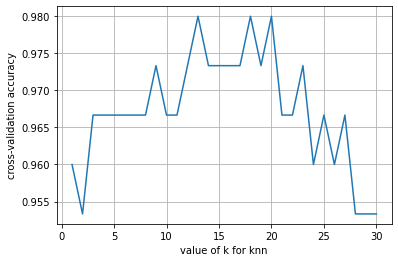

In [ ]:
plt.plot(k_range,grid_mean_scores)
plt.xlabel('value of k for knn')
plt.ylabel('cross-validation accuracy')
plt.grid()

In [ ]:
grid_best=grid.best_score_
print(grid_best)
grid_param=grid.best_params_
print(grid_param)
grid_estimator=grid.best_estimator_
print(grid_estimator)



0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


#**searching multiple parameters simultaneously**

In [ ]:
#define the parameter values that should be searched
k_range=range(1,31)
weight_options=['uniform','distance']

In [ ]:
param_grid=(knn,{n_eighbors=k_range,weights=weight_options},cv=10,scoring='accuracy')
grid.fit(X, y)
print(param_grid)

In [ ]:
grid.fit(X, y)

In [ ]:
 print(estimator.get_params().keys())

# **Reducing computational expense using RandomizedSearchCV**

In [ ]:
from sklearn.grid_search import RandomizedSearchCV

In [ ]:
parm_dist= dict(n_neighbors=k_range,weights=weight_options) 

In [ ]:
#n_iter controls the number of search
rand=randomizedSearchCV(knn,param_dist,cv=10,scoring='accuracy',n_iter=10,random_state=5)
rand.fit(X,y)
rand.grid_scores_

In [ ]:
#examine the best model 
print rand.best_score_
print rand.best_params_

In [ ]:
#run RandomizedSearchCV 20 times (with n_iter=10)and record the best score
best_scores=[]
for _in range(20):
  rand=randomizedSearchCV(knn,param_dist,cv=10,scoring='accuracy',n_iter=10)
  rand.fit(X,y)
  vest_scores.append(round(rand.best_score_,3))
  print best_scores
